<a href="https://colab.research.google.com/github/yahyaAboamer/Handwritten-digit-recogniser/blob/master/colabNotebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [18]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [19]:
# Load MNIST dataset
(X_train_full, y_train_full), (X_test, y_test) = tf.keras.datasets.mnist.load_data()

In [20]:
# Split into training and validation sets
X_train, y_train = X_train_full[:-5000], y_train_full[:-5000]
X_valid, y_valid = X_train_full[-5000:], y_train_full[-5000:]

# Normalize pixel values
X_train, X_valid, X_test = X_train / 255., X_valid / 255., X_test / 255.

In [22]:
# Class names digits 0-9
class_names = [str(i) for i in range(10)]

In [24]:
class_names[y_train[0]]

'5'

In [25]:
# Model architecture
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=[28, 28]),
    tf.keras.layers.Dense(300, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [26]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)                  │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 300)                 │         235,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 100)                 │          30,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 10)                  │           1,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 266,610 (1.02 MB)

 Trainable params: 266,610 (1.02 MB)

 Non-trainable params: 0 (0.00 B)

In [27]:
# Get weights from first hidden layer
hidden1 = model.layers[1]
hidden1.name
weights, biases = hidden1.get_weights()
weights

array([[ 0.04129507, -0.04630529,  0.01982136, ..., -0.01043782,
        -0.0711922 , -0.05207362],
       [ 0.04154418,  0.04223353,  0.01131661, ...,  0.03705961,
         0.06507958,  0.02351261],
       [ 0.04109664,  0.01141337,  0.03453244, ..., -0.07304823,
        -0.0101632 ,  0.00996598],
       ...,
       [-0.01760693, -0.05037435,  0.03598065, ...,  0.01494157,
         0.06494354,  0.05487202],
       [-0.06786971, -0.00398165, -0.04226336, ...,  0.01875246,
        -0.01162028,  0.03709564],
       [-0.0190617 ,  0.05369358,  0.03078527, ..., -0.04551711,
         0.06542653,  0.02890418]], dtype=float32)

In [28]:
# Compile model
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

In [29]:
# Train model
history = model.fit(X_train, y_train, epochs=30,
                      validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.7431 - loss: 1.0211 - val_accuracy: 0.9304 - val_loss: 0.2599
Epoch 2/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9142 - loss: 0.3020 - val_accuracy: 0.9470 - val_loss: 0.2005
Epoch 3/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9306 - loss: 0.2463 - val_accuracy: 0.9552 - val_loss: 0.1685
Epoch 4/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.9430 - loss: 0.2043 - val_accuracy: 0.9618 - val_loss: 0.1501
Epoch 5/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9476 - loss: 0.1809 - val_accuracy: 0.9652 - val_loss: 0.1366
Epoch 6/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.9552 - loss: 0.1559 - val_accuracy: 0.9644 - val_loss: 0.1296
Epoch 7/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.9603 - loss: 0.1398 - val_accuracy: 0.9686 - val_loss: 0.1166
Epoch 8/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9639 - loss: 0.12

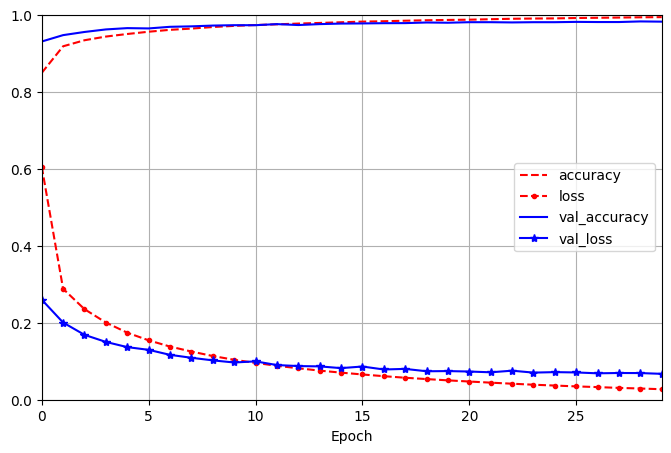

In [31]:
# Plot training history
pd.DataFrame(history.history).plot(
    figsize=(8, 5), xlim=[0, 29], ylim=[0, 1], grid=True, xlabel="Epoch",
    style=["r--", "r--.", "b-", "b-*"])
plt.show()

In [32]:
# Evaluate model on test set
model.evaluate(X_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9743 - loss: 0.0800


[0.0690188929438591, 0.9772999882698059]

In [33]:
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(2)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [34]:
y_pred = y_proba.argmax(axis=-1)
y_pred

array([7, 2, 1])

In [35]:
# Compare predictions with actual labels
y_new = y_test[:3]
y_new

array([7, 2, 1], dtype=uint8)